In [136]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.cort_processor import *
from src.plotter import *
from src.filters import *
import math
import pickle
import pandas as pd
from sklearn.utils import shuffle
import scipy
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from matplotlib.pyplot import cm
from scipy import signal
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from matplotlib import colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
import tdt 
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, iirnotch, filtfilt, resample, hilbert, welch
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
from scipy.io import savemat
from scipy.fft import fftshift

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
teq0203 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/0203/tequatl0203')
teq0203.process()
toby0203 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/0203/toby0203')
toby0203.process()

read from t=0s to t=320.15s
read from t=0s to t=290.62s
read from t=0s to t=253.21s
read from t=0s to t=188.67s
read from t=0s to t=113.09s


(array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [ 20.,   0.,  20., ...,   0.,  60.,   0.],
        ...,
        [ 80.,  60.,  40., ...,  20.,  80., 100.],
        [180.,  20.,  60., ...,  80.,  20.,   0.],
        [ 20.,   0.,   0., ...,  20.,   0.,  20.]]),
 array([[ 88.95275778,  94.71711449,  86.22899081, ...,  42.40118374,
          87.86017426, 126.33708159],
        [ 26.68132462, 180.28104984,  20.43888561, ...,  -2.32371846,
         107.75273917, 114.48496548],
        [ 36.90430914, 157.06319146,  34.68676427, ...,  23.50136321,
          90.0279674 , 118.41107348],
        ...,
        [107.48630504,  67.14731732, 110.10545158, ...,  67.16862597,
          92.82100413, 132.45734263],
        [118.66298404,  65.69348422, 111.78204641, ...,  66.26677238,
          82.23637523, 131.40405639],
        [137.35534636,  66.39207435, 111.41167332, ...,  74.24663695,
          78.63800053, 119.38689083]]))

Initial r2:0.02006200821495599 control:-0.13293824096016277 test:-0.0847938766232594


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
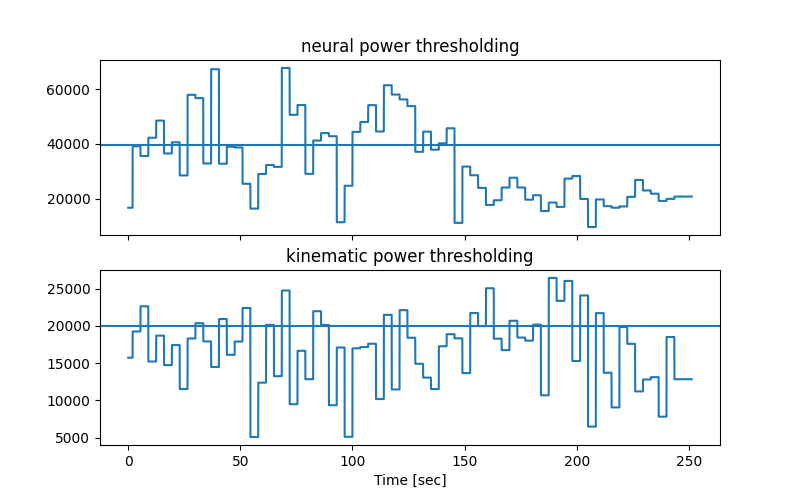

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
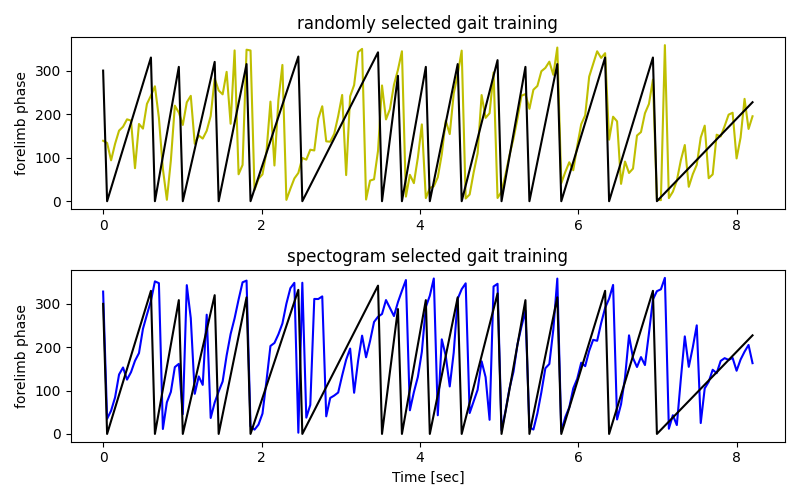

In [3]:
toby0203.spectrum_training_selector()

Initial r2:0.0020517592489195102 control:-0.03315316961267449 test:0.021391223316944992


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
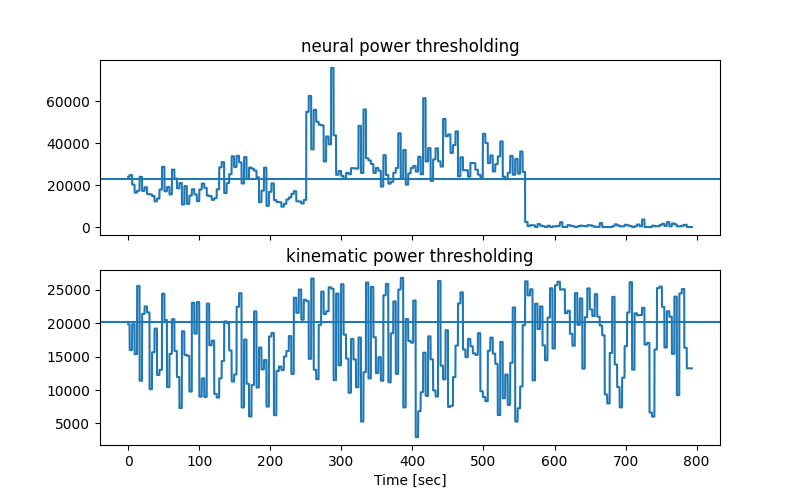

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
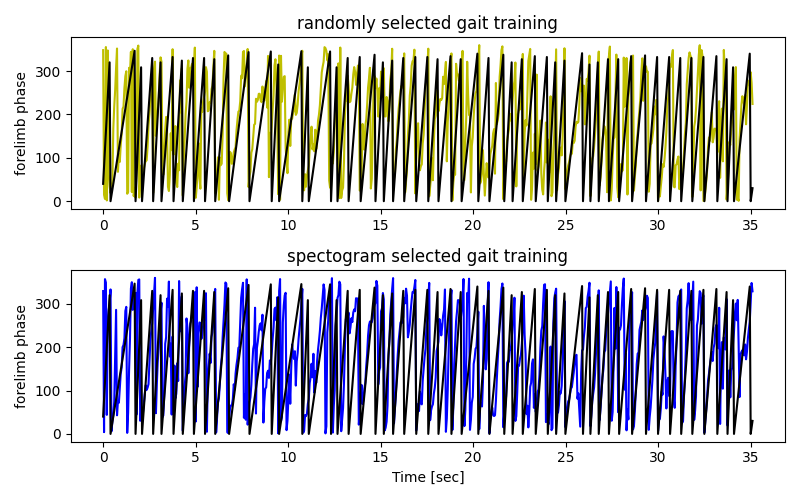

In [4]:
teq0203.spectrum_training_selector()

In [90]:
rollie1216 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie_results/1216')
rollie1216.process()



read from t=0s to t=345.41s
read from t=0s to t=360.07s


(array([[ 0.,  0., 20., ...,  0., 20.,  0.],
        [20., 80., 80., ..., 20.,  0., 20.],
        [ 0., 20., 40., ...,  0.,  0.,  0.],
        ...,
        [ 0., 20., 20., ..., 20.,  0., 20.],
        [ 0., 40., 20., ...,  0.,  0., 20.],
        [20.,  0., 20., ...,  0., 40., 20.]]),
 array([[165.04212637,  62.05968537,  68.01284291, ...,  88.44347268,
          77.77221799, 125.00880864],
        [160.80700108,  76.4108133 ,  68.46222572, ..., 115.92204272,
          68.26463126,  97.59397445],
        [165.82847801,  90.56513028,  68.26985874, ..., 113.70652281,
          71.22853429,  98.90918859],
        ...,
        [161.89538783,  58.82980113,  63.46532531, ...,  56.20058932,
          90.54743637, 170.73173551],
        [157.370791  ,  53.93712258,  65.16367026, ...,  54.73827367,
          87.52572024, 171.54052801],
        [151.05325149,  48.35280331,  65.28979724, ...,  55.52980295,
          77.94177814, 150.82884125]]))

In [91]:
rollie1216.data['rates'][0][:,0]

array([ 0., 20.,  0., ...,  0.,  0.,  0.])

In [93]:
rollie1220 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie_results/1220')
rollie1220.process()

read from t=0s to t=342.9s
read from t=0s to t=374.4s


(array([[40.,  0., 20., ..., 20.,  0., 40.],
        [40., 20.,  0., ..., 20., 20.,  0.],
        [ 0.,  0.,  0., ..., 40., 20.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [20.,  0., 20., ...,  0.,  0.,  0.]]),
 array([[155.18008942,  62.31714595, 124.58387345, ...,  39.84568486,
         123.52170626, 146.73617002],
        [144.70160036,  64.46756092, 171.69413784, ...,  16.29213078,
         151.63924658, 140.44733846],
        [142.00795507,  57.59573013, 147.14232081, ...,  22.70757773,
         145.95248501, 139.58505765],
        ...,
        [158.12726101,  76.46171251,  96.31090285, ..., 104.91160728,
          90.27138438, 125.4602608 ],
        [162.82654766,  86.69692307,  97.59230142, ...,  91.3241497 ,
          87.43559725, 130.96974981],
        [163.71225636,  87.92152975,  92.2227918 , ...,  83.59751062,
          97.35160338, 160.5808409 ]]))

In [94]:
rollie0203 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie_results/0203_injured')
rollie0203.process()

read from t=0s to t=408.64s
read from t=0s to t=252.75s


(array([[20.,  0., 20., ..., 20.,  0.,  0.],
        [ 0.,  0., 20., ..., 40.,  0., 40.],
        [ 0.,  0.,  0., ...,  0.,  0., 40.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 40.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[ 23.37701381,  67.62919842,  98.64098741, ...,  53.21874543,
          66.11676168, 134.84300986],
        [ 16.95694581,  61.44118704,  98.4339997 , ...,  52.76080405,
          62.88596522, 136.10951269],
        [ 20.38517547,  64.94998954, 100.1242264 , ...,  57.77572746,
          62.30402792, 125.14685829],
        ...,
        [ 50.92483436,  56.72068353,  78.62261441, ...,  46.79212919,
          67.40964929, 150.31960607],
        [ 47.41116849,  56.87376802,  76.36508481, ...,  46.35572004,
          66.08127549, 146.08469394],
        [ 49.50627769,  54.99486129,  69.50015836, ...,  51.56564304,
          66.6470387 , 133.73004392]]))

Initial r2:0.08840641728534455 control:0.323605010875622 test:0.3450103817403488


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
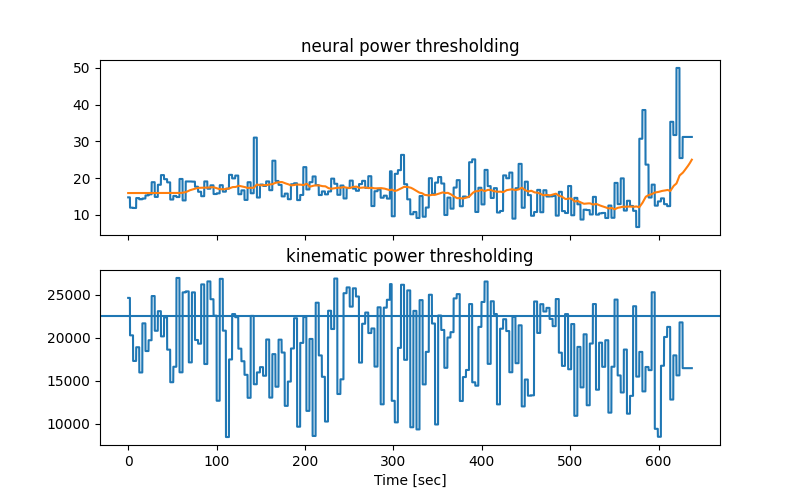

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
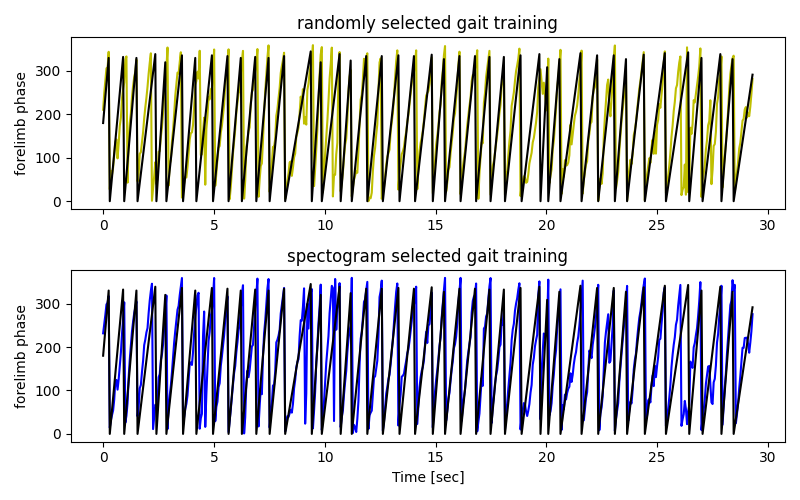

In [147]:
rollie1216.spectrum_training_selector()

Initial r2:0.10146351026020867 control:0.28298931719103515 test:0.26176758619803353


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
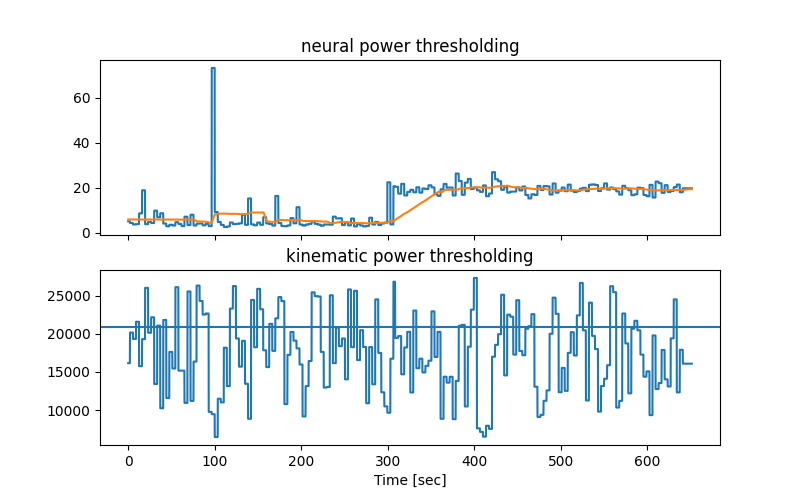

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
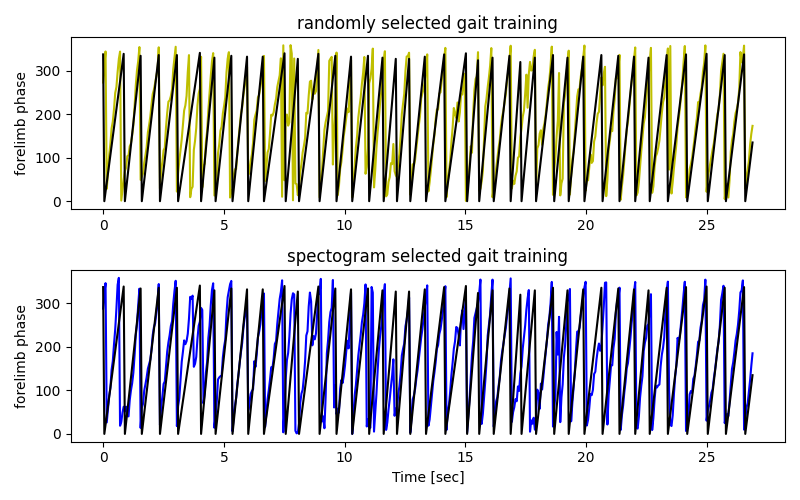

In [148]:
rollie1220.spectrum_training_selector()

/mnt/c/oobootoo/rat-fes/src/cort_processor.py:1093: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3, (ax0, ax1) = plt.subplots(2, 1, figsize=(8,5),sharex = False)


Initial r2:0.020363166411167373 control:0.007580085424053829 test:0.049112138330522734


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
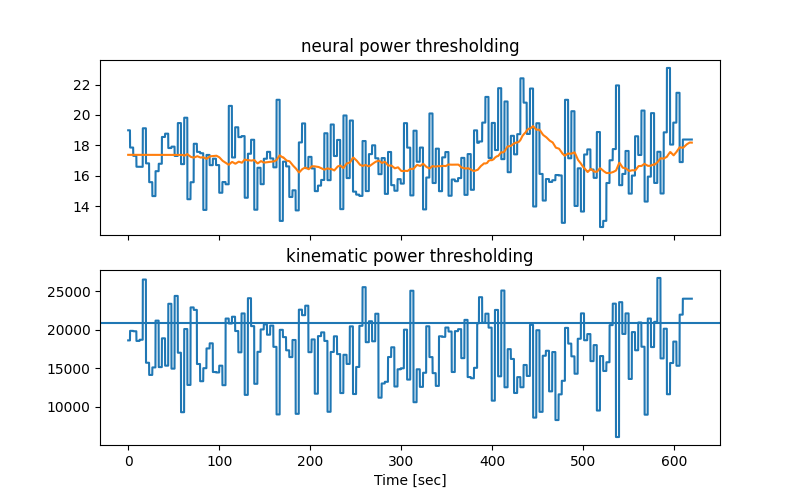

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
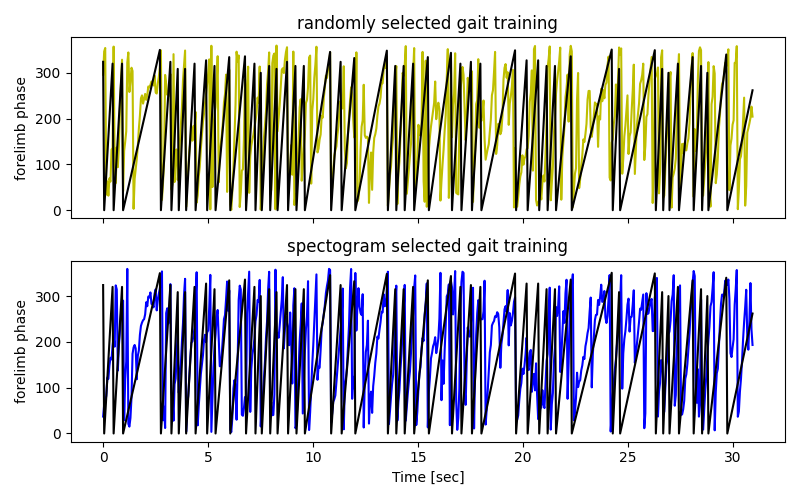

In [151]:
rollie0203.spectrum_training_selector()

In [150]:
_, angles = rollie0203.stitch_and_format()

Text(0.5, 1.0, 'spike rate spectrogram')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
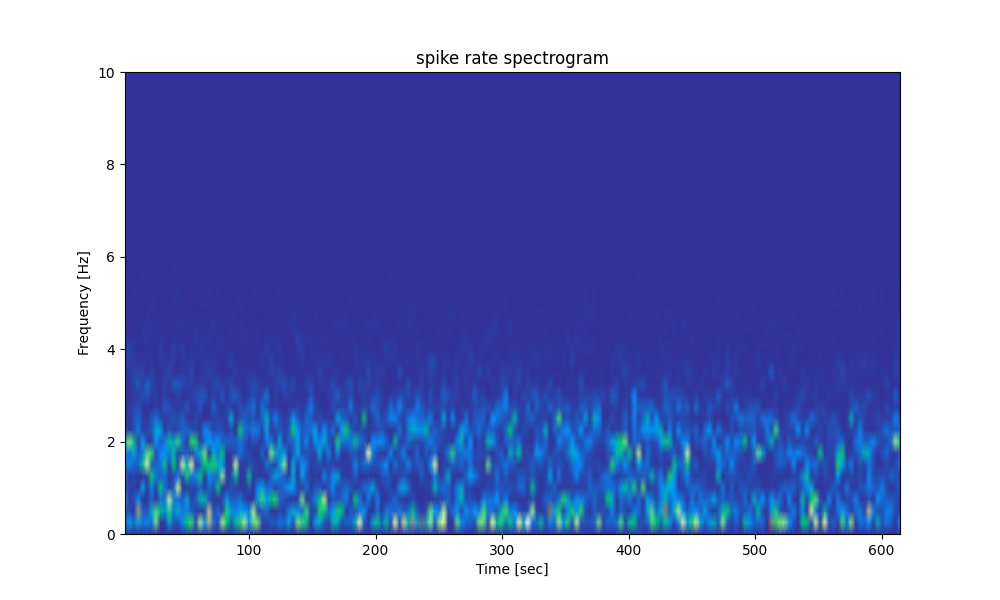

In [8]:
window=4
seconds = window
fs_kin = 20
nperseg_kin = int(seconds*fs_kin)

f_kin6, t_kin6, Sxx_kin6 = signal.spectrogram(angles[:,6], fs = fs_kin, nperseg = nperseg_kin)

fig, (ax2) = plt.subplots(1, 1, figsize=(10,6))
ax2.pcolormesh(t_kin6, f_kin6, Sxx_kin6, cmap = 'terrain', shading='gouraud')
ax2.set_ylim([0,10])
ax2.set_ylabel('Frequency [Hz]')
ax2.set_xlabel('Time [sec]')
ax2.set_title('spike rate spectrogram')


In [ ]:
print(n

In [10]:
print(Sxx_kin6.shape)

(41, 176)


In [11]:
print(Sxx_kin6)

[[1.84948677e-01 1.71883674e+01 3.15717345e+00 ... 4.12286776e+00
  4.57383424e+00 1.44719251e+01]
 [8.36581217e+01 1.91246557e+02 1.06806948e+02 ... 7.02787624e+01
  3.44494051e+00 1.48611988e+02]
 [7.91412065e+01 4.66486729e+01 5.20934800e+00 ... 1.13378792e+02
  3.17191003e+01 2.13846601e+01]
 ...
 [2.83809200e-02 1.18182487e-03 1.13690779e-01 ... 1.32960453e-02
  1.66363303e-01 1.22694020e-02]
 [1.64277444e-02 3.74660850e-02 3.32773586e-02 ... 4.45209416e-04
  1.58305054e-02 2.11449976e-02]
 [3.68427868e-04 1.02823869e-02 7.74598235e-02 ... 2.09464496e-04
  7.03300945e-03 9.93474500e-02]]


In [15]:
from sklearn.preprocessing import normalize,MinMaxScaler

In [16]:
Sxx_1D = Sxx_kin6.reshape([-1,1])
scaler = MinMaxScaler()
Sxx_1D_scaled = scaler.fit_transform(Sxx_1D)
Sxx_scaled = Sxx_1D_scaled.reshape(Sxx_kin6.shape)

In [98]:
Sxx_kin6.shape

[autoreload of src.cort_processor failed: Traceback (most recent call last):
  File "/home/grant/anaconda3/envs/rat-fes/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/grant/anaconda3/envs/rat-fes/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/grant/anaconda3/envs/rat-fes/lib/python3.7/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/grant/anaconda3/envs/rat-fes/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _c

(41, 176)

In [114]:
t62 = t_kin6.copy()
Sxx2 = Sxx_kin6.copy()

In [115]:
t_stash = []
t_stash.append(t_kin6)
t62 = t62 + t_stash[0][-1]
t_stash.append(t62)
print(t62)

[ 616.5  620.   623.5  627.   630.5  634.   637.5  641.   644.5  648.
  651.5  655.   658.5  662.   665.5  669.   672.5  676.   679.5  683.
  686.5  690.   693.5  697.   700.5  704.   707.5  711.   714.5  718.
  721.5  725.   728.5  732.   735.5  739.   742.5  746.   749.5  753.
  756.5  760.   763.5  767.   770.5  774.   777.5  781.   784.5  788.
  791.5  795.   798.5  802.   805.5  809.   812.5  816.   819.5  823.
  826.5  830.   833.5  837.   840.5  844.   847.5  851.   854.5  858.
  861.5  865.   868.5  872.   875.5  879.   882.5  886.   889.5  893.
  896.5  900.   903.5  907.   910.5  914.   917.5  921.   924.5  928.
  931.5  935.   938.5  942.   945.5  949.   952.5  956.   959.5  963.
  966.5  970.   973.5  977.   980.5  984.   987.5  991.   994.5  998.
 1001.5 1005.  1008.5 1012.  1015.5 1019.  1022.5 1026.  1029.5 1033.
 1036.5 1040.  1043.5 1047.  1050.5 1054.  1057.5 1061.  1064.5 1068.
 1071.5 1075.  1078.5 1082.  1085.5 1089.  1092.5 1096.  1099.5 1103.
 1106.5 1110.  1113.

In [126]:
Sxx_test = np.hstack([Sxx_kin6, Sxx2])
t_test = np.concatenate(t_stash)

In [128]:
print(t_test.shape)
print(Sxx_test.shape)

(352,)
(41, 352)


In [23]:
print(min(Sxx_1D_scaled))

[0.]


Text(0.5, 1.0, 'spike rate spectrogram')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
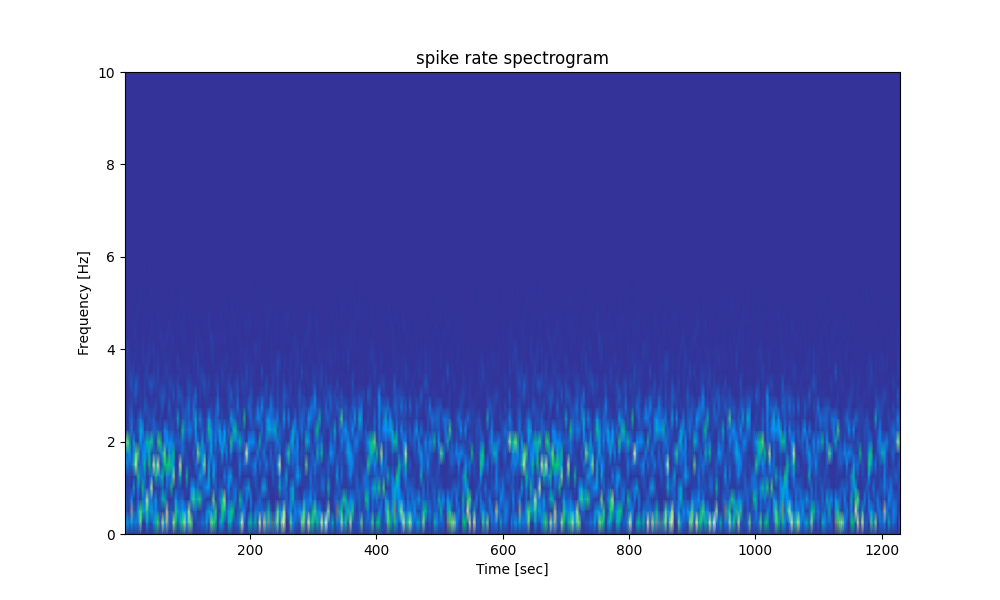

In [129]:
fig, (ax2) = plt.subplots(1, 1, figsize=(10,6))
ax2.pcolormesh(t_test, f_kin6, Sxx_test, cmap = 'terrain', shading='gouraud')
ax2.set_ylim([0,10])
ax2.set_ylabel('Frequency [Hz]')
ax2.set_xlabel('Time [sec]')
ax2.set_title('spike rate spectrogram')

In [119]:
print(t_test)

[[   2.     5.5    9.    12.5   16.    19.5   23.    26.5   30.    33.5
    37.    40.5   44.    47.5   51.    54.5   58.    61.5   65.    68.5
    72.    75.5   79.    82.5   86.    89.5   93.    96.5  100.   103.5
   107.   110.5  114.   117.5  121.   124.5  128.   131.5  135.   138.5
   142.   145.5  149.   152.5  156.   159.5  163.   166.5  170.   173.5
   177.   180.5  184.   187.5  191.   194.5  198.   201.5  205.   208.5
   212.   215.5  219.   222.5  226.   229.5  233.   236.5  240.   243.5
   247.   250.5  254.   257.5  261.   264.5  268.   271.5  275.   278.5
   282.   285.5  289.   292.5  296.   299.5  303.   306.5  310.   313.5
   317.   320.5  324.   327.5  331.   334.5  338.   341.5  345.   348.5
   352.   355.5  359.   362.5  366.   369.5  373.   376.5  380.   383.5
   387.   390.5  394.   397.5  401.   404.5  408.   411.5  415.   418.5
   422.   425.5  429.   432.5  436.   439.5  443.   446.5  450.   453.5
   457.   460.5  464.   467.5  471.   474.5  478.   481.5  485. 

Text(0.5, 1.0, 'spike rate spectrogram')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
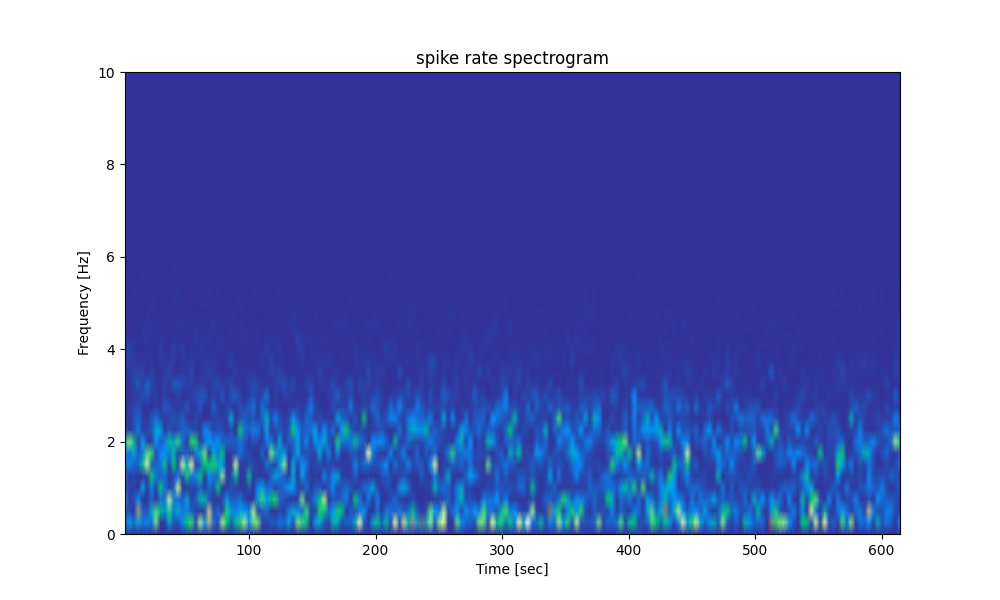

In [18]:
fig, (ax2) = plt.subplots(1, 1, figsize=(10,6))
ax2.pcolormesh(t_kin6, f_kin6, Sxx_scaled, cmap = 'terrain', shading='gouraud')
ax2.set_ylim([0,10])
ax2.set_ylabel('Frequency [Hz]')
ax2.set_xlabel('Time [sec]')
ax2.set_title('spike rate spectrogram')

In [67]:
a = np.array([[600, 700, 800,900,100,200,300,400,500,600,700,800,900,800,700,200,300,100,400,500,600]])
b = np.array([200, 200, 200, 100, 100, 100, 100, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200])


crossings = np.diff((a < b), prepend=0)

In [68]:
print(a.shape)
print(a.T)

(1, 21)
[[600]
 [700]
 [800]
 [900]
 [100]
 [200]
 [300]
 [400]
 [500]
 [600]
 [700]
 [800]
 [900]
 [800]
 [700]
 [200]
 [300]
 [100]
 [400]
 [500]
 [600]]


In [43]:
print(crossings)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0]


In [56]:
rolling_window = 4
rolling_std = np.array(pd.DataFrame(a).rolling(window=rolling_window).std())
for i in range(0,rolling_window-1):
    rolling_std[i] = rolling_std[rolling_window-1]
print(rolling_std.T)

[[129.09944487 129.09944487 129.09944487 129.09944487 359.39764421
  408.24829046 359.39764421 129.09944487 129.09944487 129.09944487
  129.09944487 129.09944487 129.09944487  81.64965809  81.64965809
  310.9126351  294.39202888 262.99556397 129.09944487 170.78251277
  216.02468995]]


In [41]:
a.rolling(window=20).std()

AttributeError: 'numpy.ndarray' object has no attribute 'rolling'

In [ ]:
rollie1216

In [ ]:
rollie1220

In [ ]:
rollie1129.CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie_results/1129')
rollie1129.process(threshold_multiplier = -3.0, window = 15)
roll1209.CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie_results/1209')
rollie1209.process(threshold_multiplier = -3.0, window = 15)

In [ ]:
h_angle29, vaf_array29, final_test_x29, final_test_y09 = rollie1129.decode_angles()
h_angle09, vaf_array09, final_test_x09, final_test_y29 = rollie1129.decode_angles()
